# Exercício

Suponha que no final de semana haverá um festival de queijos e você queira modelar um Perceptron para predizer se vai ou não nesse festival. Para tomar a decisão, utilizará 3 variáveis (features) binárias:
- $x_1$: O tempo está bom?
- $x_2$: Seu namorado/a quer te acompanhar?
- $x_3$: Tem transporte público por perto? (Você não tem carro)

Considere o bias como a feature $x_0$ com valor $1$ e seu peso como sendo o quanto você está disposto a ir nesse festival. Note que o seu valor cresce no sentido negativo, ou seja, quanto mais próximo de zero, mais você gosta de queijo e está disposto a ir, enquanto valores negativos grandes indicam que não tem tanto desejo de ir.

Nessas condições, modele o perceptron de forma que:

1. Você adora queijo e vá mesmo que seu/ua namorado/a não vá e não exista transporte público próximo. No entanto, se chover fica muito ruim e com certeza não irá.

2. Você vai ao festival se o tempo estiver bom OU se seu/ua namorado/a quiser ir E tiver transporte público.

---

## 1. Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

## 2. Gerando dados para classificação

In [2]:
from itertools import product

In [3]:
df = pd.DataFrame(columns=['Chuva', 'Companhia', 'Transporte público'])
m = 1
n = 3
for i in product("01", repeat=m*n):
    df_length = len(df)
    df.loc[df_length] = i

In [4]:
df = df.astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Chuva               8 non-null      int64
 1   Companhia           8 non-null      int64
 2   Transporte público  8 non-null      int64
dtypes: int64(3)
memory usage: 256.0 bytes


In [6]:
x_0 = [1]*8
df.insert(0, 'x_0', x_0)

In [7]:
df

,x_0,Chuva,Companhia,Transporte público
0,1,0,0,0
1,1,0,0,1
2,1,0,1,0
3,1,0,1,1
4,1,1,0,0
5,1,1,0,1
6,1,1,1,0
7,1,1,1,1


In [8]:
X = df
y1 = [1, 1, 1, 1, 0, 0, 0, 0]
y2 = [1, 1, 1, 1, 0, 0, 0, 1]

## 3. Aplicando o classificador Perceptron

* Caso 1  
---

In [9]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y1)

Perceptron()

In [10]:
y_pred = clf.predict(X)

In [11]:
clf.score(X,y1)

1.0

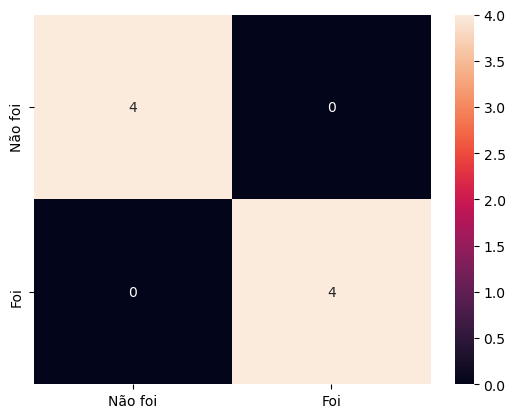

In [12]:
class_names = ['Não foi', 'Foi']

cm = confusion_matrix(y1, y_pred)


df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
# plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True)
plt.show()

In [13]:
print(classification_report(y1, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



* Caso 2  
---

In [14]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y2)

Perceptron()

In [15]:
y_pred = clf.predict(X)

In [16]:
clf.score(X,y2)

0.75

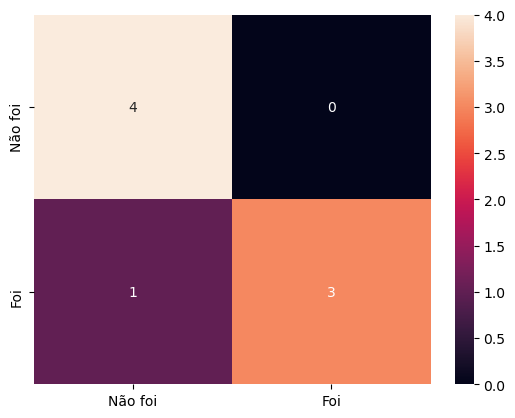

In [17]:
class_names = ['Não foi', 'Foi']

cm = confusion_matrix(y1, y_pred)

df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
# plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True)
plt.show()

In [18]:
print(classification_report(y2, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8

